# Project Overview -- KNN

### 1.0.1  Breast Cancer Wisconsin Diagnostic

In this project, we are going to work with the real dataset on Breast Cancer Wisconsin (Diagnostic). The dataset is available on kaggle and originally belong to UCI Machine Learning Repository.
This dataset was donated to UCI by Nick Street in 1995 for the public use. Relevant Papers and detailed description on the dataset are provided at UCI website.



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('Breast_Cancer_Diagnostic.csv')
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

##### We will only consider ten real-valued features in this project for diagnostic.

In [4]:
df = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','diagnosis']]
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,M


##### Let's get an overview of our data using info(), and let's check if there are any missing values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
radius_mean               569 non-null float64
texture_mean              569 non-null float64
perimeter_mean            569 non-null float64
area_mean                 569 non-null float64
smoothness_mean           569 non-null float64
compactness_mean          569 non-null float64
concavity_mean            569 non-null float64
concave points_mean       569 non-null float64
symmetry_mean             569 non-null float64
fractal_dimension_mean    569 non-null float64
diagnosis                 569 non-null object
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


##### Let's see which type cancer is common

In [9]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

##### Let's standardize the variable/features to get your data ready for knn

In [10]:
from sklearn.preprocessing import StandardScaler

##### Let's create a scaler

In [12]:
scaler = StandardScaler()

##### Let's split data into features and target to fit scaler to the features only.

In [13]:
features = df.drop('diagnosis', axis = 1)
target = df['diagnosis']

##### Fitting scaler to the features

In [14]:
scaler.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

##### Let's get the scaled features into scaled_features

In [16]:
scaled_features = scaler.transform(features)

##### Let's do the train_test_split by using test_size = 0.33, random_state = 42

In [22]:
from sklearn.model_selection import train_test_split
X = scaled_features
y = target
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=0.33, random_state=42)

##### Let's import the KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier

##### Let's create a KNN model instance with n_neighbors=1

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)

##### Let's fit the model to training data

In [25]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

##### Let's do the prediction for the data test

In [27]:
predictions = knn.predict(X_test)

##### Let's print the Confusion matrix and the classifier report

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           B       0.95      0.94      0.95       121
           M       0.90      0.91      0.90        67

   micro avg       0.93      0.93      0.93       188
   macro avg       0.92      0.93      0.92       188
weighted avg       0.93      0.93      0.93       188

[[114   7]
 [  6  61]]


##### Let's use the Elbow method, and find the best value of k

In [36]:
err_rate = []
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    
    err_rate.append(np.mean(pred_i !=y_test))

##### Let's plot the error rate Vs k to see wich value have the lowest error rate

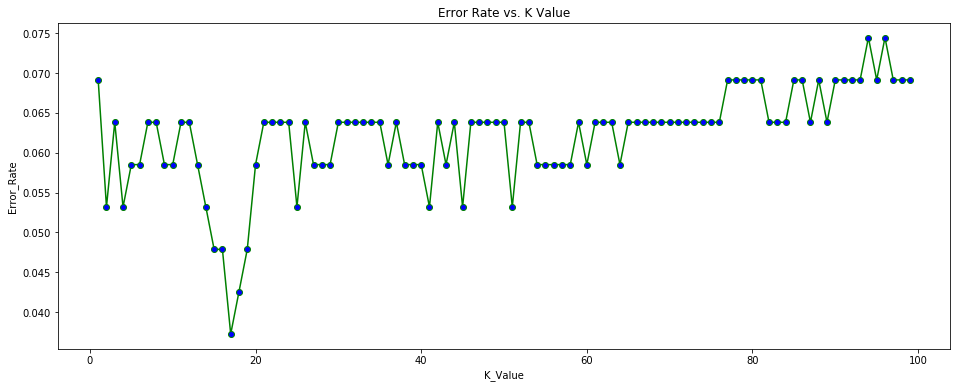

In [37]:
plt.figure(figsize=(16,6))
plt.plot(range(1,100), err_rate, color ='green',
        marker ='o', markerfacecolor = 'blue')
plt.title('Error Rate vs. K Value')
plt.xlabel('K_Value')
plt.ylabel('Error_Rate')

plt.show()

##### Let's use k for the minimum error rate, do the predictions and print confusion matrix and classification report

In [38]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           B       0.97      0.98      0.97       121
           M       0.95      0.94      0.95        67

   micro avg       0.96      0.96      0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188

[[118   3]
 [  4  63]]


##### More data we have better we can train our model.